In [64]:
import tensorflow as tf 

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [66]:
df=pd.read_csv('Churn_Modelling.csv')

In [67]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [69]:
geo = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)


In [70]:
X=X.drop(['Geography','Gender'],axis=1)

In [71]:
X = pd.concat([X,gender,geo],axis=1)

In [72]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True


In [74]:
X['Male'].dtype

dtype('bool')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sdfg

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on your feature data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,ELU,LeakyReLU,PReLU
from tensorflow.keras.layers import Dropout
# What Dropout does is it makes 30% of the neurons as NULL


In [ ]:
classifier=Sequential()

In [ ]:
# Adding 1 input and 2 Hidden Layers
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [ ]:
#Adding the Output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
# By default adam uses learning rate as 0.1
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
# You can even change the learning rate 
"""import tensorflow 
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)"""

'import tensorflow \nopt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)'

In [ ]:
# Early Stopping 

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience= 20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
#patience : No. of iterations of epoch
#verbose : 
#monitor : Means trianing will stop is monitor stops decreasing 
#min

In [ ]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100


536/536 [==============================] - 4s 4ms/step - loss: 0.5331 - accuracy: 0.7839 - val_loss: 0.4700 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4802 - accuracy: 0.7953 - val_loss: 0.4525 - val_accuracy: 0.7910
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4678 - accuracy: 0.7964 - val_loss: 0.4447 - val_accuracy: 0.7910
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4578 - accuracy: 0.7964 - val_loss: 0.4401 - val_accuracy: 0.7910
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4433 - accuracy: 0.8052 - val_loss: 0.4303 - val_accuracy: 0.8012
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4368 - accuracy: 0.8095 - val_loss: 0.4244 - val_accuracy: 0.8088
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4343 - accuracy: 0.8112 - val_loss: 0.4190 - val_accuracy: 0.8232
Epoch 8/100

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

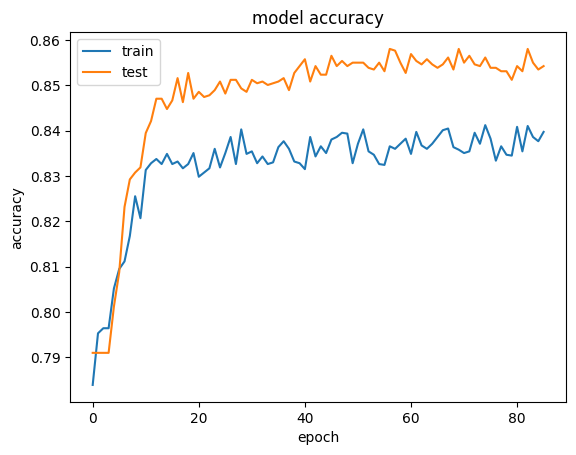

In [ ]:
# Summarize History for accuracy 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
y_pred=classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
cm

array([[1561,   46],
       [ 236,  157]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.859

In [ ]:
classifier.get_weights() 

[array([[ 0.03867729, -0.06857356,  0.06892234,  0.22002947,  0.03974967,
          0.05432298,  0.01810605,  0.09708914, -0.08439267,  0.18576272,
          0.15225103],
        [ 0.6797338 ,  0.6053494 ,  0.1867825 , -0.15415658,  0.75677276,
         -0.84094334,  0.00109066, -0.8249901 , -0.82028764, -0.05723535,
          0.37208524],
        [ 0.00495924, -0.13913369,  0.1021288 ,  0.1301382 ,  0.06525462,
         -0.00820983, -0.01528739, -0.02700599,  0.10311034,  0.00153889,
          0.08636742],
        [-0.3986963 ,  0.27299452, -0.8211399 ,  0.05818202, -0.01941136,
         -0.10880374, -0.4846687 , -0.01123641, -0.20311253,  0.02587218,
         -0.14543727],
        [-0.6938385 ,  0.9630513 , -0.13088673,  1.0595607 ,  0.85371166,
          0.64666355,  0.8839534 ,  0.01533637,  0.9725519 , -0.4234619 ,
          0.20366731],
        [-0.00698658, -0.05242362, -0.12115719,  0.01572081,  0.04578005,
         -0.08804486, -0.00991114,  0.02894813, -0.12539405,  0.3065596